Modify the following code to use jointplot from seaborn, show the histograms for each axis along with a smooth line.

Text(0.5, 0.5, "$y'_1$")

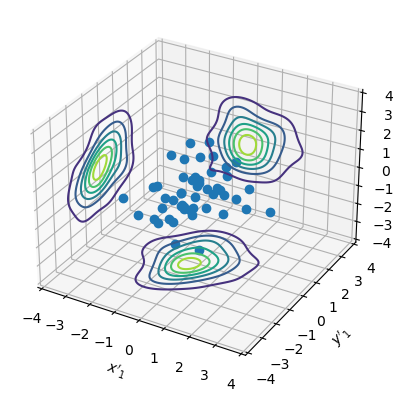

In [8]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# generate some points of a 3D Gaussian
points = np.random.normal(size=(3, 50))

# do kernel density estimation to get smooth estimate of distribution
# make grid of points
x, y, z = np.mgrid[-4:4:100j, -4:4:100j, -4:4:100j]
kernel = sp.stats.gaussian_kde(points)
positions = np.vstack((x.ravel(), y.ravel(), z.ravel()))
density = np.reshape(kernel(positions).T, x.shape)

# now density is 100x100x100 ndarray

# plot points
ax = plt.subplot(projection='3d')
ax.plot(points[0,:], points[1,:], points[2,:], 'o')


# plot projection of density onto z-axis
plotdat = np.sum(density, axis=2)
plotdat = plotdat / np.max(plotdat)
plotx, ploty = np.mgrid[-4:4:100j, -4:4:100j]
ax.contour(plotx, ploty, plotdat, offset=-4, zdir='z')

#This is new
#plot projection of density onto y-axis
plotdat = np.sum(density, axis=1) #summing up density along y-axis
plotdat = plotdat / np.max(plotdat)
plotx, plotz = np.mgrid[-4:4:100j, -4:4:100j]
ax.contour(plotx, plotdat, plotz, offset=4, zdir='y')

#plot projection of density onto x-axis
plotdat = np.sum(density, axis=0) #summing up density along z-axis
plotdat = plotdat / np.max(plotdat)
ploty, plotz = np.mgrid[-4:4:100j, -4:4:100j]
ax.contour(plotdat, ploty, plotz, offset=-4, zdir='x')
#continue with your code

ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_zlim((-4, 4))

ax.set_zlabel("$y'_2$")
ax.set_xlabel("$x'_1$")
ax.set_ylabel("$y'_1$")



<BarContainer object of 10 artists>

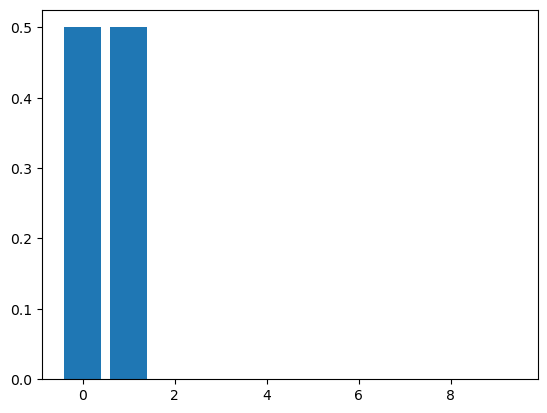

In [14]:
'''
Plot a bar chart of 10-dimensional vector
'''
import numpy as np
import matplotlib.pyplot as plt

vector = np.array([0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
plt.bar(range(10), vector)


Text(0, 0.5, '$x_1$')

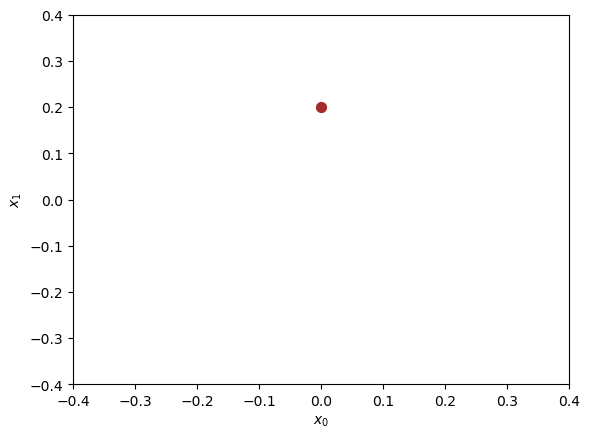

In [12]:
'''
Plot a point in a scatter plot with limits [-0.4,0.4]x[-0.4,0.4]
'''
import numpy as np
import matplotlib.pyplot as plt

point = np.array([0.0, 0.2])
plt.scatter(point[0], point[1], s=50, c='brown')   
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")

/Users/fgonza/miniforge3/envs/tf2_py39/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(


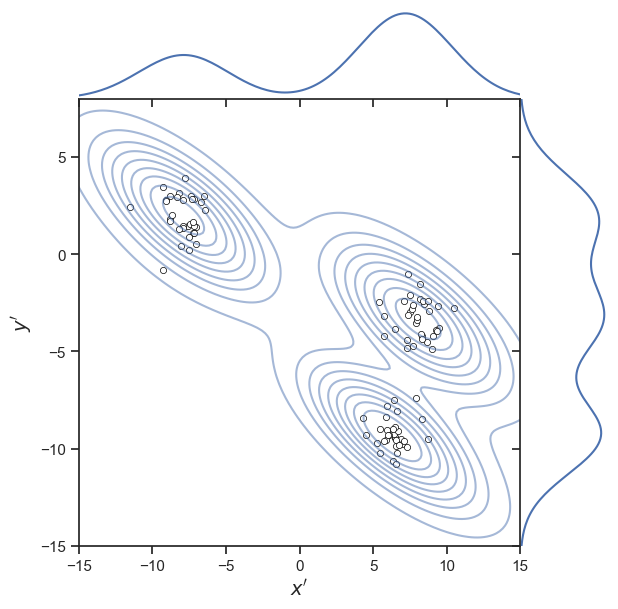

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

n_comp_xy=100
# Generate 100 points with 2 features and 1 cluster
xy, _ = make_blobs(n_samples=n_comp_xy, n_features=2, centers=3, random_state=6)

# Create a joint plot using seaborn
sns.set(style="ticks")
g = sns.jointplot(x=xy[:,0], y=xy[:,1], kind='kde', space=0, joint_kws={'s': 10, 'alpha': 0.5})

# Add a scatter plot with custom marker style and size
g.plot_joint(plt.scatter, marker='o', c='white', edgecolor='black', s=20, linewidth=0.5)

# Set x and y labels
g.set_axis_labels("$x'$", "$y'$", fontsize=14)
#set x and y limits
g.ax_joint.set_xlim(-15, 15)
g.ax_joint.set_ylim(-15, 8)
# Show the plot
plt.show()


- Write python code to generate 50 points and use seaborn to plot them along with a kde estimation of the density
- The points must be unidimensional
- Plot the points in the x-axis and eliminate the y-axis


1.898553935512518 -2.38387536102315


/Users/fgonza/miniforge3/envs/tf2_py39/lib/python3.9/site-packages/seaborn/utils.py:258: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


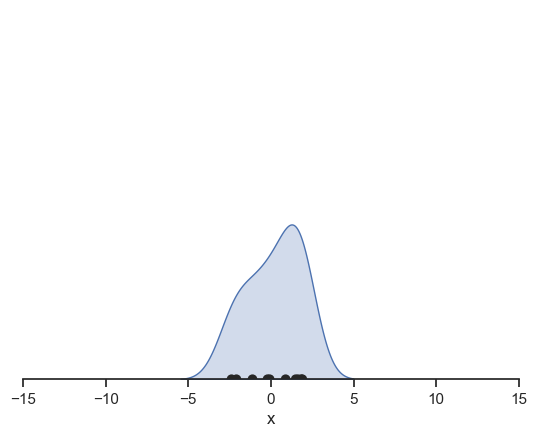

In [3]:
import seaborn as sns
import numpy as np

# Generate 50 random points
n_comp_x=10
#x = np.random.randn(n_comp_x)[:, np.newaxis] - 10.
x = np.random.randn(n_comp_x)[:, np.newaxis] 
print(np.max(x), np.min(x))
# Create a KDE plot using seaborn
sns.set(style="ticks")
sns.kdeplot(x, fill=True)

# Plot the points as black strips along the x-axis
sns.stripplot(x, palette='dark:black', 
              jitter=False, orient='h', 
              marker='o', facecolor='none', s=7)


# Remove the legend, y-axis label, and set y-axis limits
plt.gca().set_ylim([0, 0.5])
plt.gca().set_xlim([-15, 15])
sns.despine(left=True, trim=True)
sns.utils.axlabel("x", "")
plt.gca().legend_.remove()
plt.yticks([])

# Show the plot
plt.show()

In [4]:
import kqm
sigma = 1.
kernel = kqm.RBFKernelLayer(sigma=sigma, dim=1)
kqmu = kqm.KQMUnit(dim_x=1, dim_y=1, kernel=kernel, n_comp=n_comp_xy)
rho_x = kqm.comp2dm(np.ones((1, n_comp_x)) / n_comp_x, x[np.newaxis, ...])
kqmu(rho_x)
kqmu.c_x.assign(xy[:,0:1])
kqmu.c_y.assign(xy[:,1:2])
rho_y = kqmu(rho_x)
w,v = kqm.dm2comp(rho_y)
w = w[0].numpy()
v = v[0].numpy()


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-04-16 21:47:50.483457: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-16 21:47:50.484016: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


/var/folders/p_/nhqsddwd6w3923l9m2_nxxzm0000gp/T/ipykernel_24940/1227184427.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=filter_v, palette='dark:black',


([], [])

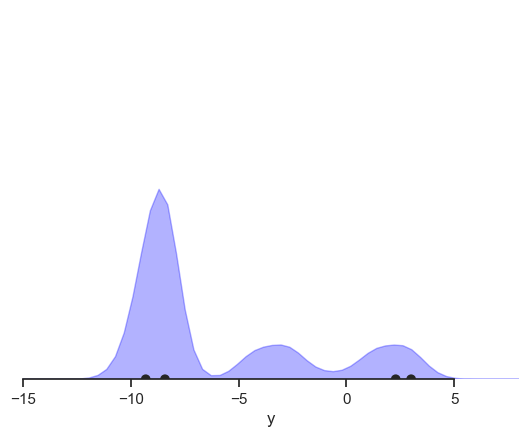

In [5]:
ys = np.linspace(-20, 20, 100)[:, np.newaxis]
kqmover = kqm.KQMOverlap(dim_x=1, kernel=kernel, n_comp=n_comp_xy)
kqmover(ys)
kqmover.c_x.assign(v)
kqmover.comp_w.assign(w)
density = kqmover(ys)
filter_v = v[w > 0.0077, 0]
# plot ys vs density usngi a blue filling with transparency 0.5
# remove y axis, y ticks and upper, left and right spines
sns.stripplot(x=filter_v, palette='dark:black', 
              jitter=False, orient='h', 
              marker='o', facecolor='none', s=7)
plt.gca().set_xlim([-15, 8])
plt.fill_between(ys.flatten(), density.numpy().flatten(), color='blue', alpha=0.3)
sns.despine(left=True, right=True, top=True, trim=True)

plt.gca().set_ylim([0, 1])

plt.gca().set_xlabel("y")
plt.yticks([])

#sns.plot(ys, density.numpy().flatten())

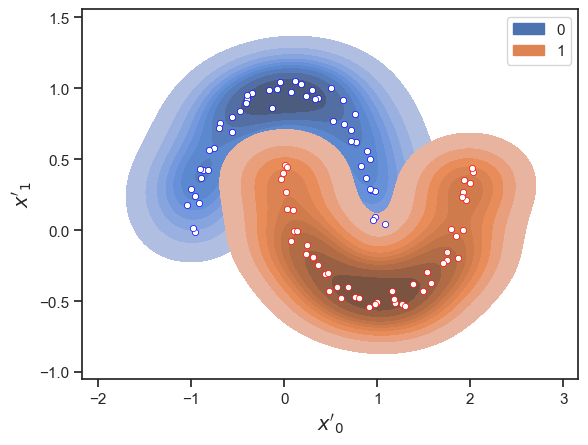

In [8]:
from sklearn.datasets import make_moons

n_comp_xy=100
# Generate 100 points with 2 features and 1 cluster
X, y = make_moons(n_samples=n_comp_xy, noise=.05, random_state=0)

X0 = X[y == 0]
X1 = X[y == 1]
# Create a joint plot using seaborn
sns.set(style="ticks")
g = sns.kdeplot(x=X[:,0], y=X[:,1], hue=y, fill=True, legend=True)
#g = sns.kdeplot(x=X0[:,0], y=X0[:,1], cmap="Blues", legend=True)
#g = sns.kdeplot(x=X1[:,0], y=X1[:,1], cmap="Reds", legend=True)
# Add a scatter plot with custom marker style and size
#g.plot_joint(plt.scatter, marker='o', c='white', edgecolor='black', s=20, linewidth=0.5)
plt.scatter(X0[:,0], X0[:,1], marker='o', c='white', edgecolor='blue', s=20, linewidth=0.5)
plt.scatter(X1[:,0], X1[:,1], marker='o', c='white', edgecolor='red', s=20, linewidth=0.5)
# Set x and y labels
g.set_xlabel("$x'_0$", fontsize=14)
g.set_ylabel("$x'_1$", fontsize=14)
# show the legend
#plt.legend(['class 0', 'class 1'])
#set x and y limits
#g.ax_joint.set_xlim(-15, 15)
#g.ax_joint.set_ylim(-15, 8)
# Show the plot
plt.show()


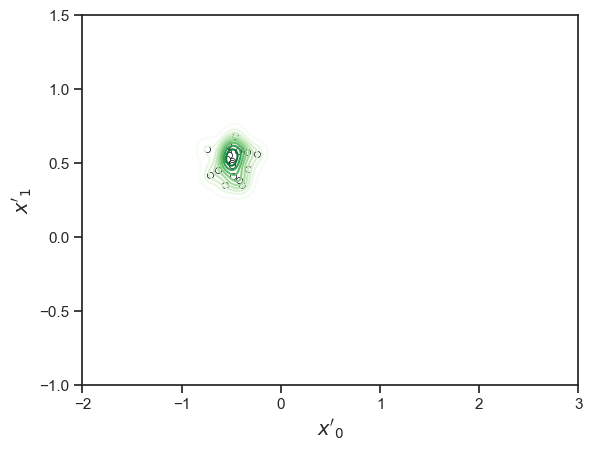

In [16]:
'''
Make a blob with 2 features and 1 cluster with 20 points with center at (-0.5,0.5)
Plot it using sns.kdeplot with black color
'''
n_comp_xy=20
# Generate 100 points with 2 features and 1 cluster
xy, _ = make_blobs(n_samples=n_comp_xy, n_features=2, centers=[[-0.5, 0.5]],
                   cluster_std=0.1,  random_state=6)
# Create a joint plot using seaborn
sns.set(style="ticks")
g = sns.kdeplot(x=xy[:,0], y=xy[:,1], cmap="Greens", legend=True)
# Add a scatter plot with custom marker style and size
#g.plot_joint(plt.scatter, marker='o', c='white', edgecolor='black', s=20, linewidth=0.5)
plt.scatter(xy[:,0], xy[:,1], marker='o', c='white', edgecolor='black', s=20, linewidth=0.5)
# Set x and y labels
g.set_xlabel("$x'_0$", fontsize=14)
g.set_ylabel("$x'_1$", fontsize=14)
#set x and y limits
g.axes.set_xlim(-2, 3)
g.axes.set_ylim(-1, 1.5)
# Show the plot
plt.show()



/Users/fgonza/miniforge3/envs/tf2_py39/lib/python3.9/site-packages/seaborn/utils.py:258: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


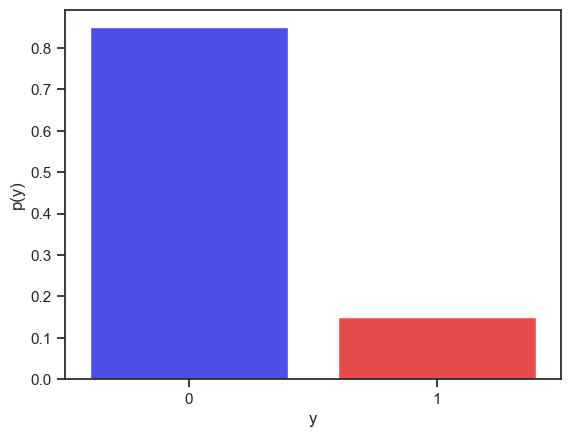

In [17]:
'''
Plot a bar chart with 2 bars with values 0.85 and 0.15 
the first bar is red and the second is blue
the x axis must have label  "y" and the y axis must have label "p(y)"
the x axis must have ticks 0 and 1
'''
# Create a bar plot using seaborn
sns.set(style="ticks")
sns.barplot(x=[0, 1], y=[0.85, 0.15], palette={1:(1, 0.2, 0.2), 0:(0.2, 0.2, 1)})
# Set x and y labels
sns.utils.axlabel("y", "p(y)")
# Set x ticks
plt.xticks([0, 1])
# Show the plot
plt.show()
